In [2]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('wind_dataset.csv', header=0)
df = df.dropna()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 5638 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     5638 non-null   object 
 1   WIND     5638 non-null   float64
 2   IND      5638 non-null   int64  
 3   RAIN     5638 non-null   float64
 4   IND.1    5638 non-null   float64
 5   T.MAX    5638 non-null   float64
 6   IND.2    5638 non-null   float64
 7   T.MIN    5638 non-null   float64
 8   T.MIN.G  5638 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 440.5+ KB


,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,5638,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000
unique,5638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.682297,0.399610,1.875647,0.012593,13.285669,0.093828,6.446949,2.757627
std,NaN,4.938009,1.189562,3.973763,0.157654,4.890483,0.303538,4.626693,5.576713
min,NaN,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-13.500000
25%,NaN,5.910000,0.000000,0.000000,0.000000,9.600000,0.000000,3.100000,-1.000000
50%,NaN,9.080000,0.000000,0.200000,0.000000,13.100000,0.000000,6.500000,3.000000
75%,NaN,12.830000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000


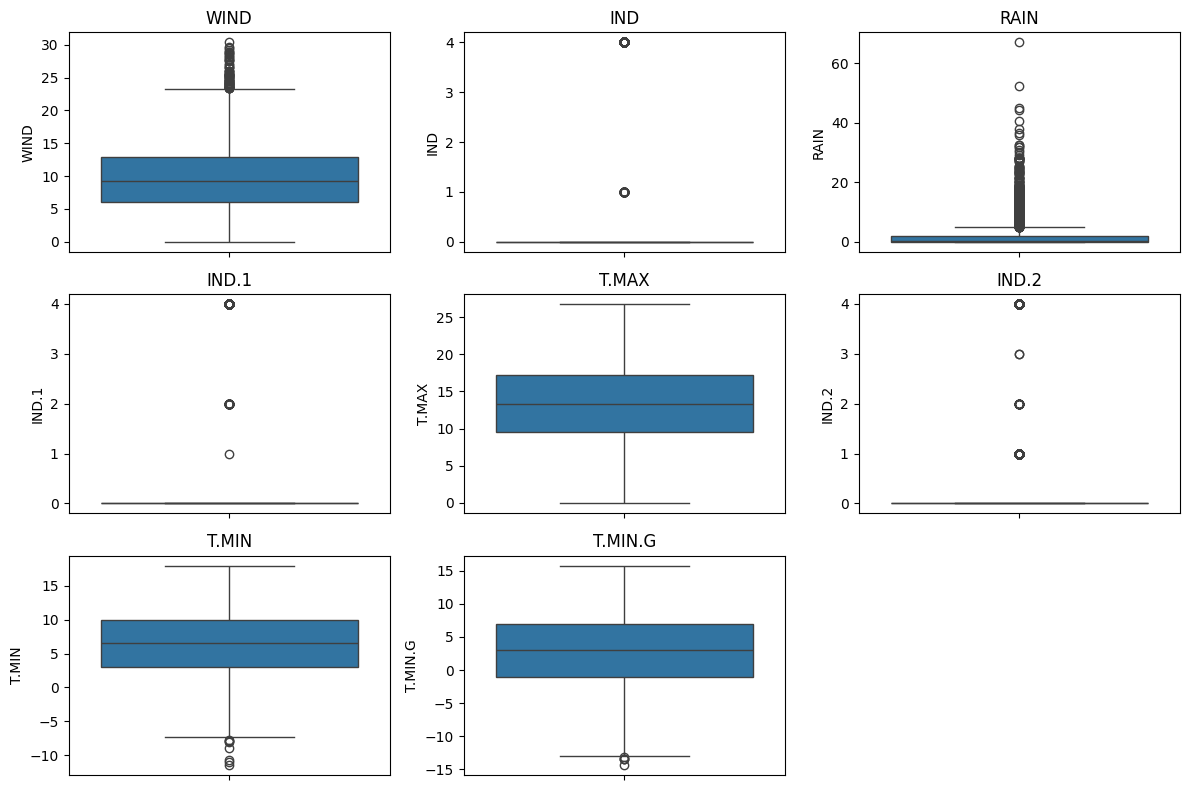

In [ ]:
numerical_columns = ["WIND", "IND", "RAIN", "IND.1", "T.MAX", "IND.2", "T.MIN", "T.MIN.G"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler


df['DATE'] = pd.to_datetime(df['DATE'])

df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

df_cleaned = df.drop(columns=['DATE'])
df_cleaned.info()
df_cleaned.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 5638 entries, 0 to 6573
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     5638 non-null   float64
 1   IND      5638 non-null   int64  
 2   RAIN     5638 non-null   float64
 3   IND.1    5638 non-null   float64
 4   T.MAX    5638 non-null   float64
 5   IND.2    5638 non-null   float64
 6   T.MIN    5638 non-null   float64
 7   T.MIN.G  5638 non-null   float64
 8   YEAR     5638 non-null   int32  
 9   MONTH    5638 non-null   int32  
 10  DAY      5638 non-null   int32  
dtypes: float64(7), int32(3), int64(1)
memory usage: 462.5 KB


,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY
count,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000
mean,9.682297,0.399610,1.875647,0.012593,13.285669,0.093828,6.446949,2.757627,1970.126641,6.484569,15.714615
std,4.938009,1.189562,3.973763,0.157654,4.890483,0.303538,4.626693,5.576713,5.184302,3.417550,8.798554
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-13.500000,1961.000000,1.000000,1.000000
25%,5.910000,0.000000,0.000000,0.000000,9.600000,0.000000,3.100000,-1.000000,1966.000000,4.000000,8.000000
50%,9.080000,0.000000,0.200000,0.000000,13.100000,0.000000,6.500000,3.000000,1971.000000,6.000000,16.000000
75%,12.830000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000,1975.000000,9.000000,23.000000
max,30.370000,4.000000,67.000000,2.000000,26.800000,3.000000,18.000000,15.800000,1978.000000,12.000000,31.000000


In [ ]:
X = df_cleaned.drop(columns=['WIND'])
y = df_cleaned['WIND']

scaler = StandardScaler()
##scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=23)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R2 score:', r2_score(y_test, predictions))

Mean Absolute Error: 3.667705889947806
Mean Squared Error: 21.33614032421903
R2 score: 0.13673646663005856


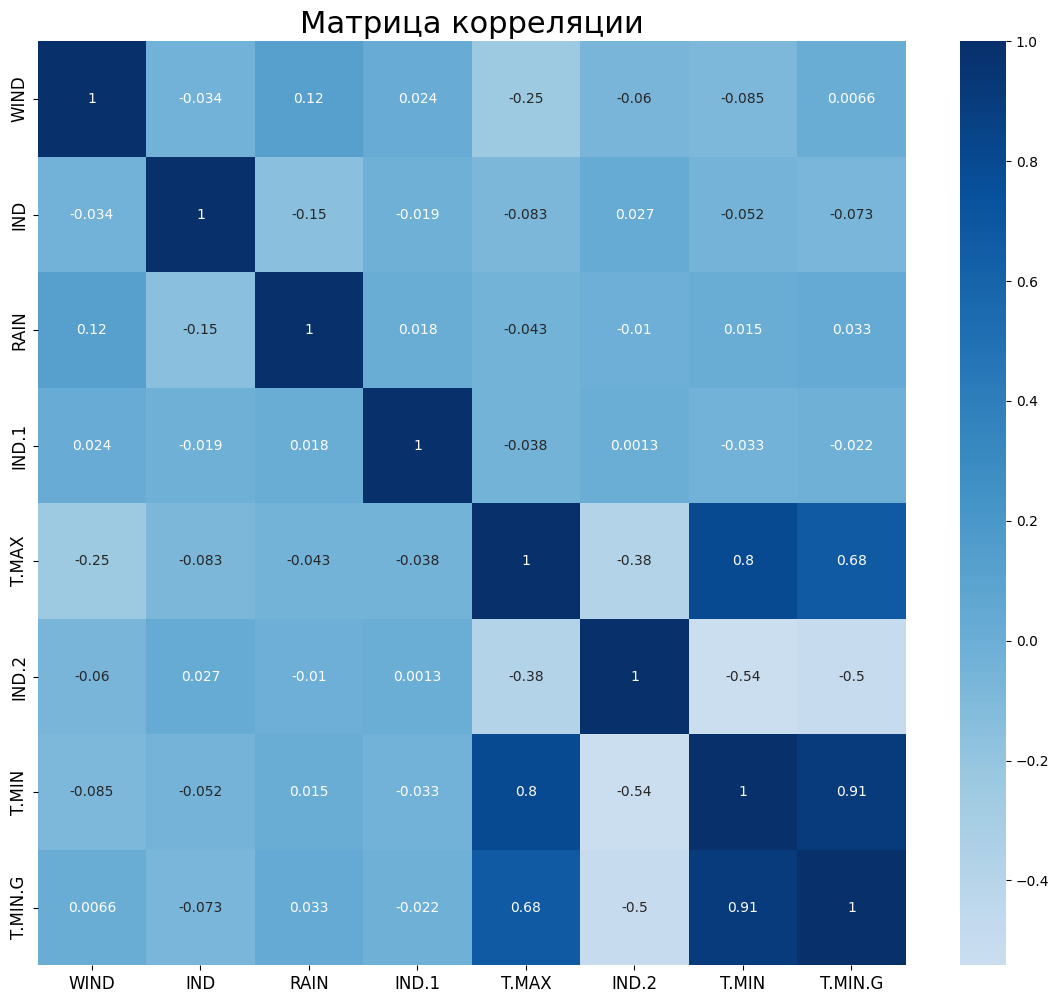

In [8]:
plt.figure(figsize=(14,12))
a = df.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Blues', center=0, annot=True)
plt.title("Матрица корреляции", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()